<a href="https://colab.research.google.com/github/lukaszplust/Deep_Learning/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
tf.__version__

'2.12.0'

Model sekwencyjny -> liniowy stos warst

In [3]:
from tensorflow.keras.models import Sequential

In [4]:
model = Sequential()
print(model)

Podstawowym elementem składowym modelu są warstwy. Aby dodać najbardziej standardową warstwę - warstwę gęsto połączoną należy użyć warstwy Dense. Warstwe do modelu można dodać poprzez -> .add(). WARSTWA DENSE -> GĘSTO POŁĄCZONA

In [5]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=4, input_shape=(10,)))# units -> liczba neuronów w warstwie, input_shape -> rozmiar danych wejsciowych (w tym przypadku dla 10 byłoby 10 "kółek:))")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


Dodanie kolejnej warstwy

In [7]:
model.add(Dense(units=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


Liniowa funkcja aktywacji

In [8]:
from tensorflow.keras.activations import linear

random_data = sorted(np.random.randn(200))
data = pd.DataFrame({'data': random_data, 'linear': linear(random_data)})
data.head()

,data,linear
0,-2.684796,-2.684796
1,-2.266756,-2.266756
2,-2.264480,-2.264480
3,-2.010770,-2.010770
4,-2.000333,-2.000333


In [9]:
px.line(data, x = 'data', y='linear', width=800, range_y = [-2,2])

Sigmoid

In [10]:
from tensorflow.keras.activations import sigmoid

data = pd.DataFrame({'data': random_data, 'sigmoid': sigmoid(random_data)})
data.head()

,data,sigmoid
0,-2.684796,0.063877
1,-2.266756,0.093914
2,-2.264480,0.094108
3,-2.010770,0.118077
4,-2.000333,0.119168


In [11]:
px.line(data, x = 'data', y='sigmoid', width=800, range_y = [-0.5,1.5])

Relu

In [12]:
from tensorflow.keras.activations import relu

data = pd.DataFrame({'data': random_data, 'relu': relu(random_data)})
data[96:105]

,data,relu
96,0.002105,0.002105
97,0.021232,0.021232
98,0.023345,0.023345
99,0.032326,0.032326
100,0.053618,0.053618
101,0.076708,0.076708
102,0.079212,0.079212
103,0.100423,0.100423
104,0.127502,0.127502


In [13]:
px.line(data, x = 'data', y='relu', width=800, range_y = [-0.5,1.5])

Hyperbolic tangens

In [14]:
from tensorflow.keras.activations import tanh

data = pd.DataFrame({'data': random_data, 'tanh': tanh(random_data)})
data.head()

,data,tanh
0,-2.684796,-0.990731
1,-2.266756,-0.978743
2,-2.264480,-0.978647
3,-2.010770,-0.964781
4,-2.000333,-0.964051


In [15]:
data.iloc[1]

data   -2.266756
tanh   -0.978743
Name: 1, dtype: float64

In [16]:
px.line(data, x = 'data', y='tanh', width=800, range_y = [-1.5,1.5])

Budowa modelu

In [17]:
model = Sequential()

model.add(Dense(units=8, activation='relu', input_shape=(10,))) #8 nauronów, funkcja aktywacji relu, rozmiar danych wejsciowych 10 cech
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


Kompilacja modelu

I. Należy określic rodzaj optymalizatora

II. Określić funkcje straty

III. Metryki, które będziemy obserwować podczas trenowania sieci

In [18]:
#klasyfikacja binarna

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # W KLASYFIKACJI BINARNEJ TYLKO!! FUNKCJA STRATY = BINARY_CROSSENTROPY
              metrics=['accuracy'])

#klasyfikacja wieloklasowa

model.compile(optimizer='rmsProp',
              loss='categorical_crossentropy',# W KLASYFIKACJI WIELOKLASOWEJ TYLKO!! FUNKCJA STRATY = BINARY_CROSSENTROPY
              metrics=['accuracy'])

#regresja
model.compile(optimizer='rmsProp',
              loss='mse') # W REGRESJI FUNKCJA STRATY = MSE lub MAE

Trenowanie modelu

epochs -> krotność przejscia danych przez sieć w procesie uczenia

batch_size -> rozmiar wsadu po którym następuje aktualizacja wag

validation_split -> część danych treningowych, które zostaną wykorzystane jako zbiór walidacyjny

validation_data -> (x_val, y_val) -> dane wykorzystane do walidacji modelu

In [19]:
#model.fit(data, labels, epochs=10, batch_size=32)
#model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2)
#model.fit(data, labels, epochs=10, batch_size=32, validation_split=0.2, validation_data=(x_val, y_val))

### Klasyfikacja binarna przykład

In [20]:
data = np.random.randn(1000,150)
labels = np.random.randint(2, size=(1000, 1))

print(data.shape)
print(labels.shape)

(1000, 150)
(1000, 1)


In [21]:
data[0]

array([-1.39877603, -0.08409155,  1.08375703,  1.12957812, -0.9528998 ,
        1.2235577 , -1.53318836, -0.99073006,  1.42970261, -0.8412085 ,
        0.66254617,  0.51874236, -1.75917106, -0.61404762, -0.01596087,
        0.64283742,  1.0693645 , -0.29346263, -1.28076939, -0.35347388,
        0.75851608, -0.138893  , -0.77459569,  0.36526753,  0.10600998,
       -1.34283211, -1.13781307, -0.97918576,  0.20640345,  0.33831358,
       -1.67827853, -2.03135222, -1.64194482,  0.30984965,  0.80354251,
       -2.16450678, -0.78481515,  2.02343053,  0.71503865, -0.83784677,
        0.17576248,  0.29662707, -0.80505837,  1.28562767,  0.16576217,
       -0.64976265, -0.52942819,  0.62078041,  0.73712175, -2.28783244,
        0.59850568,  1.10211619,  0.80285845,  1.45897902, -0.2055745 ,
        0.41027395,  0.33837148, -0.78958802, -0.55416781, -0.21833845,
        1.48455512,  0.25099383, -0.11526724,  0.27544653, -0.75855556,
        0.33263475,  1.14903804, -0.62778037, -0.79972316, -0.30

In [22]:
labels[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

Budowa modelu

In [23]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

#kompilacja
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=10)# przekazujemy labele bo jest to uczenie nadzorowane

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.9838 - accuracy: 0.4910
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7704 - accuracy: 0.5460
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6020
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6430
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.6920
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7310
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7770
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.8070
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.4640 - accuracy: 0.8340
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.8490


In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                4832      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Kompilacja z dodatkiem batch_size

In [25]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=30)# wagi aktualizowane po 30 probek

Epoch 1/10
34/34 [==============================] - 2s 5ms/step - loss: 0.8419 - accuracy: 0.5160
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.5630
Epoch 3/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6270
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6112 - accuracy: 0.6640
Epoch 5/10
34/34 [==============================] - 0s 5ms/step - loss: 0.5749 - accuracy: 0.6980
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 0.5441 - accuracy: 0.7460
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7760
Epoch 8/10
34/34 [==============================] - 0s 3ms/step - loss: 0.4894 - accuracy: 0.8070
Epoch 9/10
34/34 [==============================] - 0s 3ms/step - loss: 0.4648 - accuracy: 0.8270
Epoch 10/10
34/34 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.8480


In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                4832      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Kompilacja z dodatkiem batch_size i validation_split

In [27]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=30, validation_split=0.2)# validation_split=0.2 -> 20% danych będzie zbiorem walidacyjnym

Epoch 1/10
27/27 [==============================] - 1s 19ms/step - loss: 0.7811 - accuracy: 0.5263 - val_loss: 0.7739 - val_accuracy: 0.5150
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.5850 - val_loss: 0.7702 - val_accuracy: 0.5250
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6463 - accuracy: 0.6438 - val_loss: 0.7746 - val_accuracy: 0.5250
Epoch 4/10
27/27 [==============================] - 0s 8ms/step - loss: 0.6061 - accuracy: 0.6850 - val_loss: 0.7800 - val_accuracy: 0.5150
Epoch 5/10
27/27 [==============================] - 0s 5ms/step - loss: 0.5723 - accuracy: 0.7250 - val_loss: 0.7875 - val_accuracy: 0.5100
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: 0.5416 - accuracy: 0.7437 - val_loss: 0.7963 - val_accuracy: 0.5200
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.5135 - accuracy: 0.7750 - val_loss: 0.8080 - val_accuracy: 0.5100
Epoch 8/10
27/27 [=

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                4832      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Dodatkowo zastosowany parametr verbose, który pozwala uniknąc outputu

In [29]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=30, validation_split=0.2, verbose=0)# validation_split=0.2 -> 20% danych będzie zbiorem walidacyjnym

Przypisanie do history

In [30]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=10, batch_size=30, validation_split=0.2, verbose=0)# validation_split=0.2 -> 20% danych będzie zbiorem walidacyjnym

W przypadku history jest do wyboru: epoch, model i history

In [31]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [32]:
history.model

In [33]:
history.history

{'loss': [0.9611915349960327,
  0.7739065289497375,
  0.6814079880714417,
  0.6246888041496277,
  0.5831716656684875,
  0.5483899116516113,
  0.5178067088127136,
  0.4882684648036957,
  0.4621449410915375,
  0.4365510046482086],
 'accuracy': [0.5162500143051147,
  0.5400000214576721,
  0.5862500071525574,
  0.6637499928474426,
  0.6949999928474426,
  0.7425000071525574,
  0.7712500095367432,
  0.7962499856948853,
  0.8199999928474426,
  0.84375],
 'val_loss': [0.8876621723175049,
  0.8183643817901611,
  0.7850274443626404,
  0.7779443860054016,
  0.7798711657524109,
  0.7892085313796997,
  0.7984902858734131,
  0.8093546032905579,
  0.8195948600769043,
  0.835846483707428],
 'val_accuracy': [0.5099999904632568,
  0.49000000953674316,
  0.48500001430511475,
  0.4749999940395355,
  0.4699999988079071,
  0.4749999940395355,
  0.4749999940395355,
  0.4699999988079071,
  0.47999998927116394,
  0.49000000953674316]}

In [34]:
metrics = history.history

In [35]:
metrics.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))# Dodajemy warstwę gęsto połączoną Dense, liczba neuronów 32 (ogolnie często podaje się ją jako potęgę 2),
#relu -> model uczy się nieliniowych rozwiązań
model.add(Dense(1, activation='sigmoid'))#warstwa wyjściowa -> chcemy otrzymac prawdopodobienstwo przynaleznosci do danej klasy

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(data, labels, epochs=10, batch_size=30, validation_split=0.2, verbose=1)# validation_split=0.2 -> 20% danych będzie zbiorem walidacyjnym

Epoch 1/10
27/27 [==============================] - 1s 15ms/step - loss: 0.7627 - accuracy: 0.5075 - val_loss: 0.7891 - val_accuracy: 0.4850
Epoch 2/10
27/27 [==============================] - 0s 7ms/step - loss: 0.6793 - accuracy: 0.5850 - val_loss: 0.7858 - val_accuracy: 0.4850
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.6413 - val_loss: 0.7882 - val_accuracy: 0.5000
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 0.5870 - accuracy: 0.6900 - val_loss: 0.7948 - val_accuracy: 0.5050
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5508 - accuracy: 0.7262 - val_loss: 0.8028 - val_accuracy: 0.4900
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7613 - val_loss: 0.8132 - val_accuracy: 0.4800
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.7825 - val_loss: 0.8249 - val_accuracy: 0.4800
Epoch 8/10
27/27 [=

Przygotowanie danych testowych

In [37]:
test_data = np.random.randn(5,150)# 5 wierszy, 150 zmiennych
test_labels = np.random.randint(2, size=(5,1))# 2 -> liczby generowane od 0 do 1 włącznie

In [38]:
test_data[0]

array([ 0.13968737, -0.11610021, -0.39177674, -1.51466561, -1.17864665,
        0.70988187,  1.86734035, -1.22375487,  1.56763229,  0.05802313,
        1.14585785, -1.36485643,  0.43229638, -0.54949481, -0.24459505,
        0.55413788,  1.04720279, -0.56325785, -1.14488737, -0.21443917,
       -0.81655688,  0.48104727, -0.17472597, -0.24822052, -0.43771632,
       -0.10454886, -0.66474386,  0.68564972,  1.12224422, -0.76777145,
       -1.38687896, -0.31359854, -1.36674011, -0.17099195,  1.51137797,
       -0.29026045, -0.52885989,  1.32714527,  0.74869387, -0.00401636,
        1.82074909,  0.86147758, -1.08231669, -0.59790802, -0.56826107,
        0.21027768, -1.44387105, -2.01494771, -1.24407697,  0.2462611 ,
       -0.34484068,  1.85261252, -0.40253918, -0.53001001,  0.96810726,
        0.43565488,  0.93726194, -0.61630894,  0.12716478,  0.35458263,
        0.95340621,  1.47177102,  1.11631419, -0.02600817,  0.67073173,
       -0.71081932, -2.11673723, -0.22895563,  0.92033636,  1.10

In [39]:
test_data[1]

array([ 1.24998509, -0.29042755,  0.18335637, -0.40495093, -1.02945128,
       -1.69494153, -2.08381998, -0.67895303, -0.62974637,  0.63664266,
       -0.05950919,  0.59305761, -1.71141785, -0.39081805,  0.70876744,
       -0.42575688,  0.28302472, -0.40448114, -1.40327358,  0.35063012,
        1.41903296, -0.52725924,  1.52523701,  0.16733148, -2.0666636 ,
        0.30330837,  0.78693973,  1.18090942,  0.75538935, -0.39234391,
        0.12792359,  0.54204685,  1.2601588 , -0.3295653 ,  0.11625673,
        0.30188909,  0.20670682, -1.41223106,  1.34050715, -0.34639637,
        0.49031824,  1.75691623, -0.17126445,  1.5219692 , -0.88867726,
       -0.858363  ,  0.37023272,  1.3522841 , -0.73420382,  0.4715922 ,
        0.11389202, -1.73209269, -1.03546093, -0.14953583,  0.86142936,
        1.2034496 ,  0.59813721,  0.69794308,  0.47211632, -0.85229309,
        2.22161158, -1.54790672,  0.51324987, -2.83508146,  0.02738887,
        0.12754137, -0.09434677,  1.53206589, -1.37309015,  1.58

In [40]:
test_data[0].shape

(150,)

In [41]:
test_labels

array([[1],
       [0],
       [0],
       [1],
       [0]])

In [42]:
#mode.predict -> zwraca nam prawdopoboienstwo przynaleznosci do danej klasy

model.predict(test_data)

# wartosci > 0.5 -> klasa 1
# wartosci < 0.5 -> klasa 0

1/1 [==============================] - 0s 81ms/step


array([[0.51942945],
       [0.23671257],
       [0.5350896 ],
       [0.6345021 ],
       [0.42403528]], dtype=float32)

NEW PREDICTION CLASSES IN Tensorflow 2.6.0

In [43]:
predictions = (model.predict(test_data) > 0.5).astype("int32")
predictions

1/1 [==============================] - 0s 22ms/step


array([[1],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

### KLASYFIKACJA WIELOKLASOWA

In [44]:
data = np.random.random((1000, 150))

labels = np.random.randint(10, size=(1000, 1))

In [45]:
print(data.shape)

(1000, 150)


In [46]:
data[0]

array([0.63608592, 0.83711819, 0.63140516, 0.43085525, 0.06082555,
       0.19476631, 0.34392761, 0.4170848 , 0.85485007, 0.52748909,
       0.79392865, 0.87671103, 0.19957163, 0.50361772, 0.07001266,
       0.69284466, 0.34479688, 0.9924703 , 0.58495051, 0.49367344,
       0.30139192, 0.02249461, 0.29770124, 0.10701905, 0.75457042,
       0.88767118, 0.13515793, 0.75118727, 0.77063683, 0.8198164 ,
       0.64874961, 0.82097413, 0.29938538, 0.13847223, 0.07522958,
       0.56853932, 0.05111017, 0.32980659, 0.03040284, 0.76045869,
       0.39095892, 0.58544478, 0.09248081, 0.69687797, 0.68069223,
       0.96490196, 0.59476263, 0.13331896, 0.123877  , 0.14758423,
       0.1127625 , 0.41417421, 0.30882043, 0.72725567, 0.52315793,
       0.25638521, 0.15743495, 0.17396727, 0.9794266 , 0.89385723,
       0.25640513, 0.40723283, 0.19185886, 0.55515685, 0.93653363,
       0.42088773, 0.53706088, 0.28450436, 0.71020907, 0.94859176,
       0.05735623, 0.78133295, 0.14424248, 0.19309734, 0.39303

In [47]:
data[0].shape

(150,)

In [48]:
print(labels.shape)

(1000, 1)


In [49]:
labels[:10]

array([[7],
       [8],
       [8],
       [6],
       [2],
       [3],
       [5],
       [8],
       [4],
       [0]])

In [50]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=10)
labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [51]:
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [52]:
labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

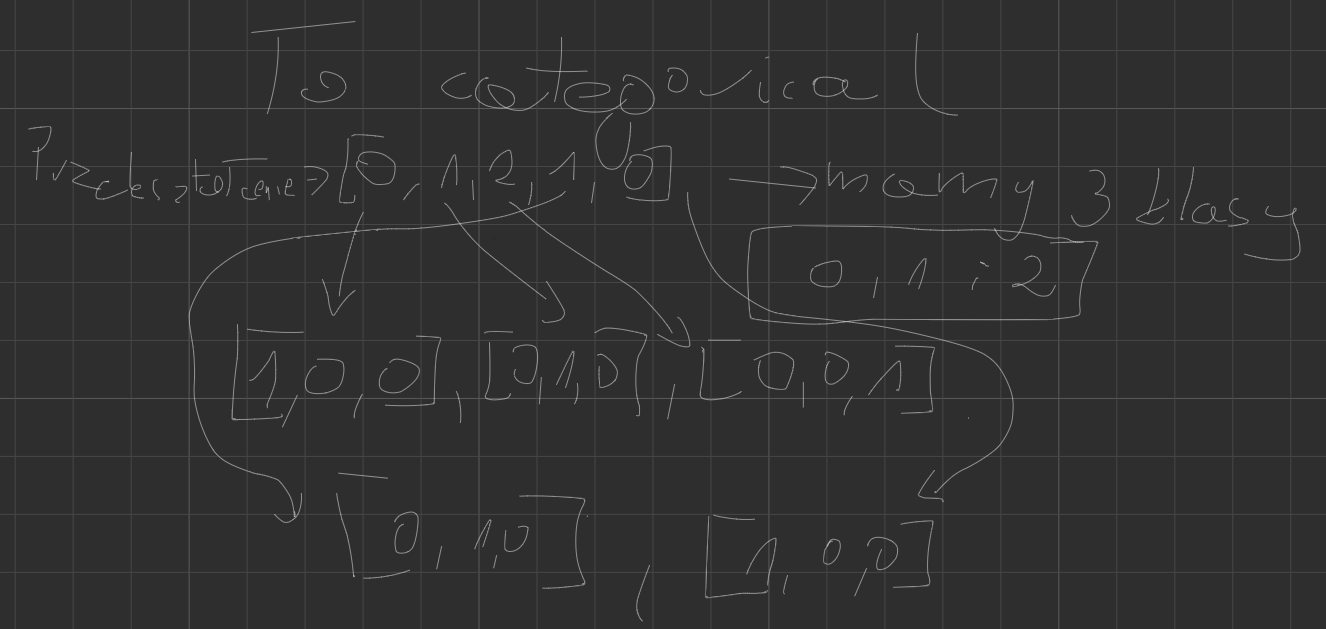

In [55]:
# 1 i 2 oraz 7 powienien być taki sam skoro mają taką samą klasę
print(labels[1])
print(labels[2])
print(labels[7])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [56]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))
model.add(Dense(units=10, activation='softmax'))# UNITS MUSI BYC TAKIE ILE JEST KLAS !!!, softmax zwroci prawdopodobienstwo przynaleznosci do klasy

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(data, labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 17ms/step - loss: 2.3338 - accuracy: 0.1175 - val_loss: 2.3375 - val_accuracy: 0.1050
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 2.2983 - accuracy: 0.1138 - val_loss: 2.3252 - val_accuracy: 0.1200
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 2.2898 - accuracy: 0.1437 - val_loss: 2.3289 - val_accuracy: 0.1000
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 2.2802 - accuracy: 0.1388 - val_loss: 2.3283 - val_accuracy: 0.1100
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 2.2665 - accuracy: 0.1525 - val_loss: 2.3328 - val_accuracy: 0.1100
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 2.2561 - accuracy: 0.1737 - val_loss: 2.3372 - val_accuracy: 0.0900
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 2.2394 - accuracy: 0.1800 - val_loss: 2.3525 - val_accuracy: 0.0700
Epoch 8/30
25/25 [=

In [57]:
test_data = np.random.random((10,150))

model.predict(test_data)

1/1 [==============================] - 0s 52ms/step


array([[0.0356311 , 0.18391295, 0.12069956, 0.03559841, 0.1074255 ,
        0.1050384 , 0.08526444, 0.09034034, 0.07808355, 0.15800567],
       [0.20718631, 0.09986737, 0.07637651, 0.15102328, 0.06580931,
        0.05745175, 0.0475882 , 0.11168087, 0.10226177, 0.08075462],
       [0.11531208, 0.07141189, 0.02745686, 0.12401379, 0.262954  ,
        0.14108446, 0.05716065, 0.08951113, 0.03411246, 0.07698268],
       [0.06220991, 0.15255103, 0.09537189, 0.06236762, 0.09201227,
        0.12655224, 0.07862712, 0.11257046, 0.04771182, 0.17002559],
       [0.05053069, 0.20419954, 0.0819998 , 0.06654119, 0.04083246,
        0.12585141, 0.13360605, 0.03945762, 0.08622662, 0.17075463],
       [0.0674003 , 0.07246298, 0.05870194, 0.13050923, 0.11577283,
        0.25031307, 0.0420051 , 0.09525556, 0.05032806, 0.1172508 ],
       [0.07810787, 0.15544856, 0.06627279, 0.06720834, 0.06174135,
        0.17192364, 0.13767534, 0.12961818, 0.08043435, 0.05156951],
       [0.04498151, 0.14138104, 0.0252903

TO CHYBA DZIAŁA W KLASYFIKACJI WIELOKLASOWEJ !!!

In [63]:
#te dane mozna odczytac z tego wyzej kazda macierz 2x5 to jedna z klas. W tym miejscu w macierzy, w ktorym wartosc jest najwyzsza zostaje odpowiednio dopasowana do danej klasy
predicted=model.predict(test_data)
result=np.argmax(predicted,axis=1)
result

1/1 [==============================] - 0s 23ms/step


array([1, 0, 4, 9, 1, 5, 5, 9, 2, 2])

A TO CHYBA DZIAŁA W KLASYFIKACJI BINARNEJ

In [60]:
#predictions = (model.predict(test_data) > 0.5).astype("int32")
#predictions

### REGRESJA

In [64]:
data = np.random.random((1000, 150))
labels = 50 * np.random.random(1000)

In [65]:
data[0]

array([0.84661888, 0.77298286, 0.60928227, 0.77338366, 0.78791149,
       0.40917669, 0.21835028, 0.30296505, 0.84782931, 0.10701853,
       0.58936432, 0.64785524, 0.8159725 , 0.67380608, 0.85707803,
       0.11679903, 0.19409557, 0.1397923 , 0.78684876, 0.03802858,
       0.67542902, 0.34219311, 0.29709296, 0.15048029, 0.72950838,
       0.45579295, 0.39395649, 0.7284974 , 0.34885396, 0.54090723,
       0.5160761 , 0.44884722, 0.21785602, 0.22819149, 0.49049733,
       0.20218232, 0.13607973, 0.32015068, 0.08442659, 0.8630428 ,
       0.77785593, 0.51216151, 0.32509002, 0.65062803, 0.58104481,
       0.20971877, 0.71025739, 0.98126102, 0.32914758, 0.6285174 ,
       0.41665247, 0.17595039, 0.94677934, 0.68847074, 0.48458324,
       0.35356674, 0.61667139, 0.5218345 , 0.25888663, 0.22022872,
       0.40500717, 0.66281619, 0.67379329, 0.90548467, 0.56416664,
       0.39587849, 0.06403952, 0.13508653, 0.54875646, 0.28419632,
       0.68625733, 0.99491001, 0.47237039, 0.18088214, 0.95761

In [66]:
labels[:10]

array([44.57365709, 35.43284446, 12.10710225,  6.16661767,  0.74288082,
       31.5256866 ,  5.13195146, 39.85041039, 30.63541734, 42.46375963])

In [67]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))
#funkcja aktywacji domyslnie jest funkcja liniową
model.add(Dense(units=1)) # 1 -> ponieważ chcemy miec przewidywana wartosc ciagłą


model.compile(optimizer='rmsprop',
              loss='mse',)


model.fit(data, labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 8ms/step - loss: 529.7536 - val_loss: 358.6505
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 285.2633 - val_loss: 236.7666
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 208.2692 - val_loss: 222.3915
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 203.8870 - val_loss: 221.5526
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 204.1340 - val_loss: 221.0123
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 203.4075 - val_loss: 221.7384
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 202.7886 - val_loss: 220.6766
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 202.2635 - val_loss: 221.4826
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 201.6965 - val_loss: 220.5735
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 201.3693 

Funkcja straty -> mae, metryka -> mse

In [68]:
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(150,)))
#funkcja aktywacji domyslnie jest funkcja liniową
model.add(Dense(units=1)) # 1 -> ponieważ chcemy miec przewidywana wartosc ciagłą


model.compile(optimizer='rmsprop',
              loss='mae',
              metrics=['mse'])


model.fit(data, labels, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
25/25 [==============================] - 1s 9ms/step - loss: 20.1594 - mse: 588.6848 - val_loss: 16.3438 - val_mse: 419.9827
Epoch 2/30
25/25 [==============================] - 0s 4ms/step - loss: 15.0400 - mse: 343.5920 - val_loss: 13.8232 - val_mse: 273.9658
Epoch 3/30
25/25 [==============================] - 0s 3ms/step - loss: 12.9034 - mse: 234.7646 - val_loss: 13.0762 - val_mse: 225.6137
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 12.3951 - mse: 206.1066 - val_loss: 13.1380 - val_mse: 222.2441
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 12.3503 - mse: 203.2137 - val_loss: 13.1708 - val_mse: 223.1951
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 12.3458 - mse: 202.7915 - val_loss: 13.0976 - val_mse: 221.0924
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 12.3214 - mse: 203.1687 - val_loss: 13.1370 - val_mse: 222.1606
Epoch 8/30
25/25 [==============================

In [69]:
test_data = np.random.random((10, 150))

model.predict(test_data)

1/1 [==============================] - 0s 101ms/step


array([[24.540478],
       [28.068775],
       [27.58319 ],
       [21.817764],
       [22.125587],
       [21.005444],
       [24.990967],
       [21.304977],
       [24.552711],
       [23.364574]], dtype=float32)